In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [25]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()  

In [26]:
X_train_full.shape

(60000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

In [28]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

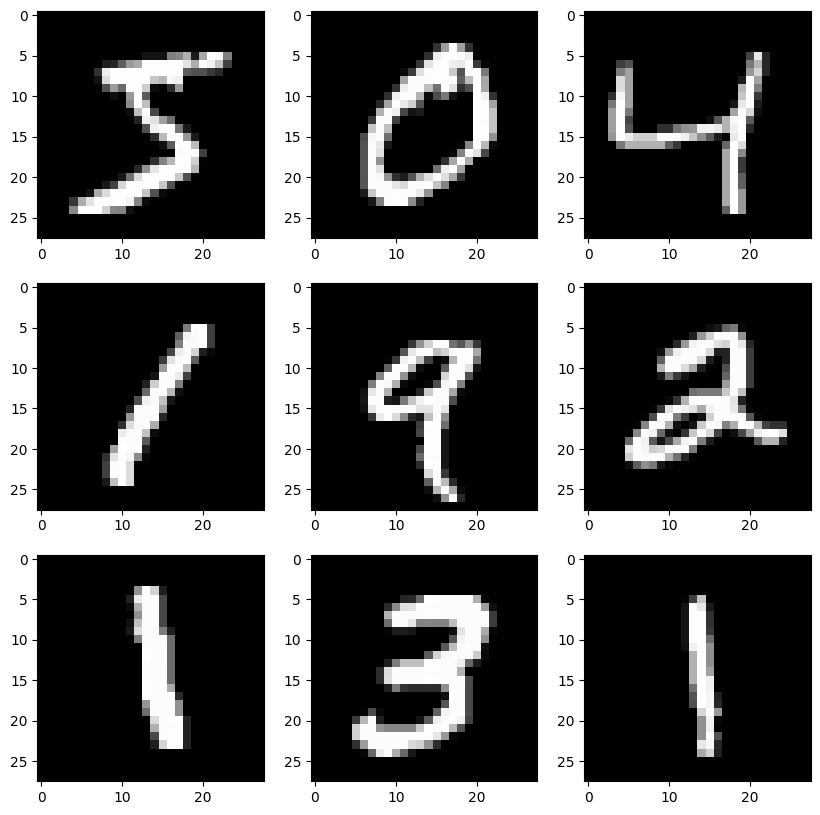

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i,j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1
        
plt.show()

In [30]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [31]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [34]:
class_names[y_train[3]]

'6'

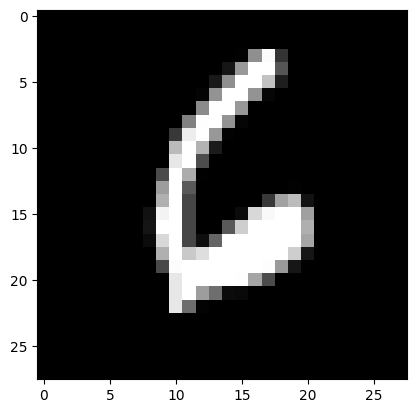

In [35]:
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))

In [42]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=30,validation_data = (X_valid, y_valid), batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6291 - accuracy: 0.8365 - val_loss: 0.3041 - val_accuracy: 0.9146
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2914 - accuracy: 0.9172 - val_loss: 0.2418 - val_accuracy: 0.9314
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2391 - accuracy: 0.9319 - val_loss: 0.2094 - val_accuracy: 0.9408
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2057 - accuracy: 0.9413 - val_loss: 0.1828 - val_accuracy: 0.9482
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1804 - accuracy: 0.9489 - val_loss: 0.1631 - val_accuracy: 0.9542
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1604 - accuracy: 0.9543 - val_loss: 0.1512 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1438 - accuracy: 0.9586 - val_loss: 0.1344 - val_accuracy

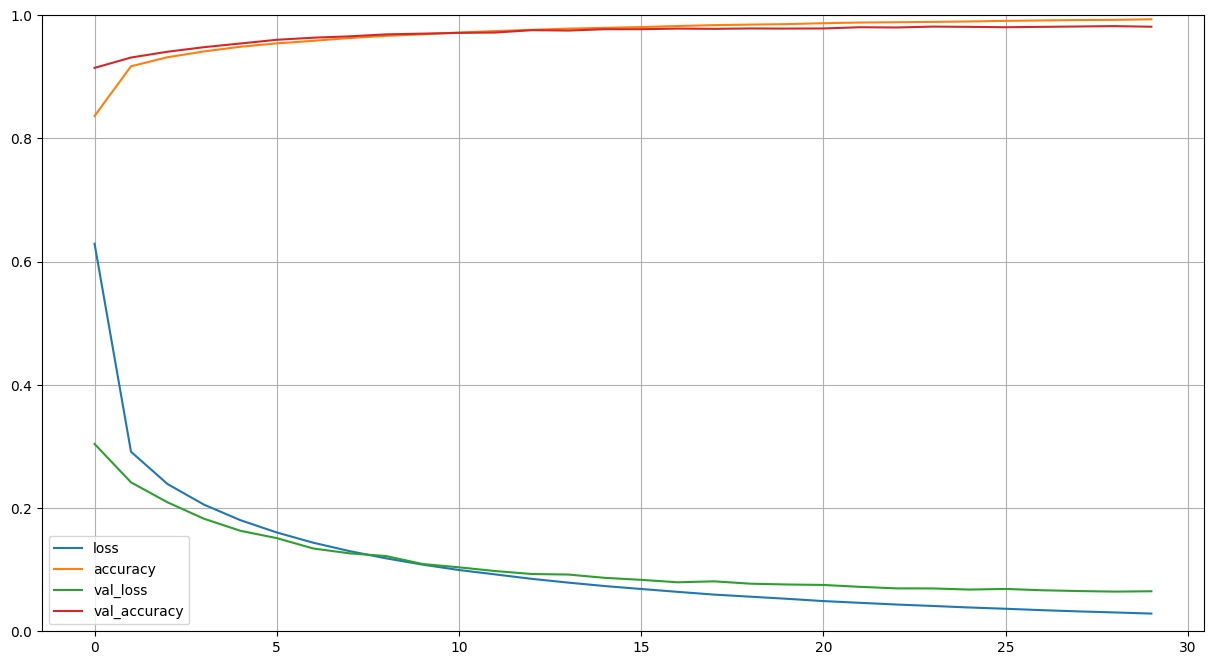

In [49]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [50]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9781


[0.07086639106273651, 0.9781000018119812]

In [58]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

313/313 [==============================] - 1s 2ms/step


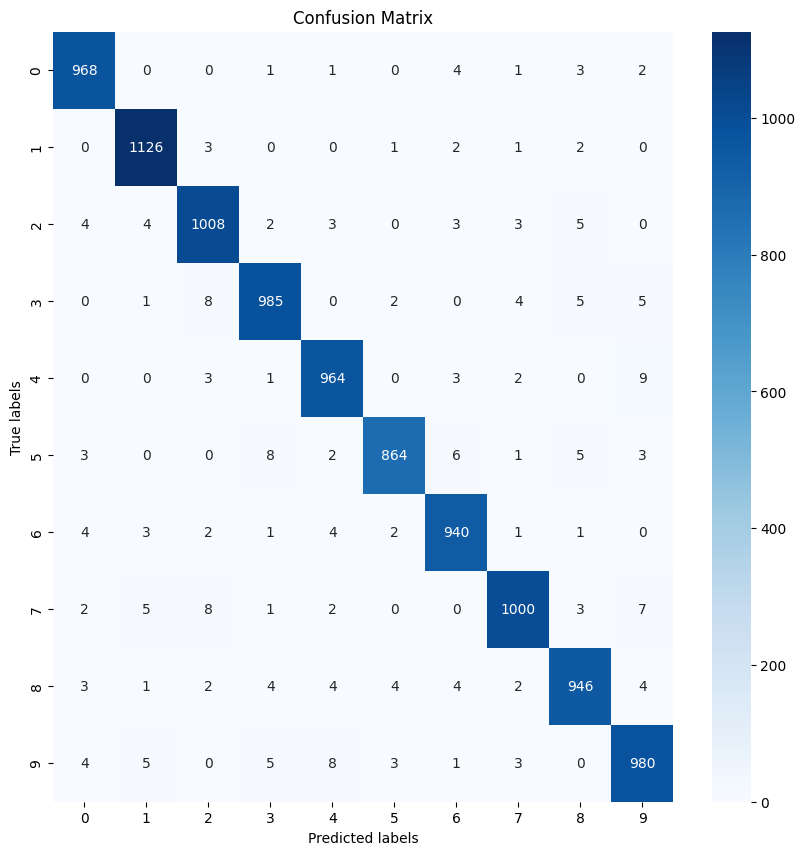

In [59]:
import seaborn as sb

fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')

fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10,10)

plt.show()
